<a href="https://colab.research.google.com/github/Homaoa/Optimization/blob/main/Optimization_a_trassnshipment_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A transshipment model with two suppliers, two itermediate centers, and two demand places.
The goal is to find the optimized product flow between suppliers, itermediate centers and demands while the costs are minimized.
Suppliers' capacities, demands, and the costs of transportation for unit are shown in the Figure below.

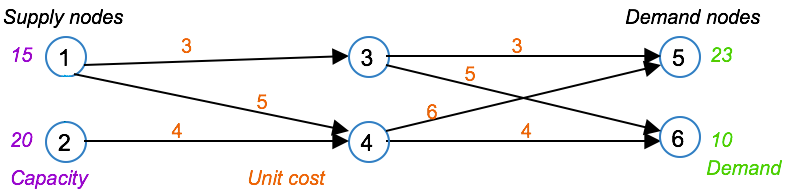

The mathematical model is as follows:

Objective Function:

    Min 3x13 + 5x14 + 4x24 + 3x35 + 5x36 + 6x45 + 4x46

St:

    x13 + x14 <= 15 
    x21 + x24 <= 20

    x13 = x35 + x36
    x14 + x24 = x45 + x46

    x35 + x45 = 23
    x36 + x46 = 10

    x(i,j) >= 0 for all i,j

In [1]:
import sys
try:
    import cplex
except:
    if hasattr(sys, 'real_prefix'):
        !pip install cplex
    else:
        !pip install --user cplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43.3 MB 1.5 MB/s 


In [2]:
import sys
try:
    import docplex.mp
except:
    if hasattr(sys, 'real_prefix'):
        !pip install docplex
    else:
        !pip install --user docplex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 610 kB 26.3 MB/s 
  Created wheel for docplex: filename=docplex-2.23.222-py3-none-any.whl size=662847 sha256=57f29351dbb324284288b4ca765884b72dda2e30cc5dddb27f174047214488b9
  Stored in directory: /root/.cache/pip/wheels/a7/c9/fb/cee5a89f304e77a39c466e625ac2830434b76eb8384999d116
Successfully built docplex


In [1]:
from docplex.mp.model import Model
tm = Model(name='Transshipment') 

In [2]:
capacities = {1:15, 2:20}
demands = {5:23 , 6:10}
costs = {(1,3):3 , (1,4):5 , (2,4):4 , (3,5):3 , (3,6):5, (4,5):6 , (4,6):4}

source = range(1,3)
intermediate = range(3,5)
target = range(5,7)

Decision Variables 

In [3]:
y = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in source for j in intermediate} 
z = {(j,k): tm.continuous_var(name='x_{0}_{1}'.format(j,k)) for j in intermediate for k in target}
x = {**y , **z}

Constraints

In [4]:
# Capacity constraints
for i in source:
    tm.add_constraint(tm.sum(x.get((i,j),0) for j in intermediate) <= capacities[i])

# Intermediate centers constraints
for j in intermediate:
    tm.add_constraint(tm.sum(x.get((i,j),0) for i in source) == tm.sum(x.get((j,k),0) for k in target))
    
# Demand constraints
for k in target:
    tm.add_constraint(tm.sum(x.get((j,k),0) for j in intermediate) == demands[k])

Objective Function

In [5]:
tm.minimize(tm.sum(x.get((i,j),0)*costs.get((i,j), float('inf')) for i in source for j in intermediate) 
            + tm.sum(x.get((j,k),0)*costs.get((j,k), float('inf')) for j in intermediate for k in demands))

tm.print_information()

Model: Transshipment
 - number of variables: 8
   - binary=0, integer=0, continuous=8
 - number of constraints: 6
   - linear=6
 - parameters: defaults
 - objective: minimize
 - problem type is: LP


Final Results

In [6]:
tms = tm.solve()
assert tms
tms.display()

solution for: Transshipment
objective: 250.000
x_1_3 = 15.000
x_2_4 = 18.000
x_3_5 = 15.000
x_4_5 = 8.000
x_4_6 = 10.000
